In [1]:
#Problem Description
#Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out the accuracy of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,
#Sepal Length
#Sepal Width
#Petal length
#Petal width

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
iris_data = load_iris()

In [5]:
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# Create a DataFrame
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

# Add the target variable 'species' to the DataFrame
df['class'] = iris_data.target

# Display the DataFrame
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [10]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [11]:
df.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

In [13]:
df.notnull().sum()

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
class                150
dtype: int64

In [14]:
df.duplicated().sum()

1

In [15]:
df.duplicated().sum()

1

In [16]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

In [17]:
df=df.drop_duplicates()
df=df.reset_index(drop=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


In [18]:
df['class'].unique()

array([0, 1, 2])

In [20]:
df.groupby('class').size()

class
0    50
1    50
2    49
dtype: int64

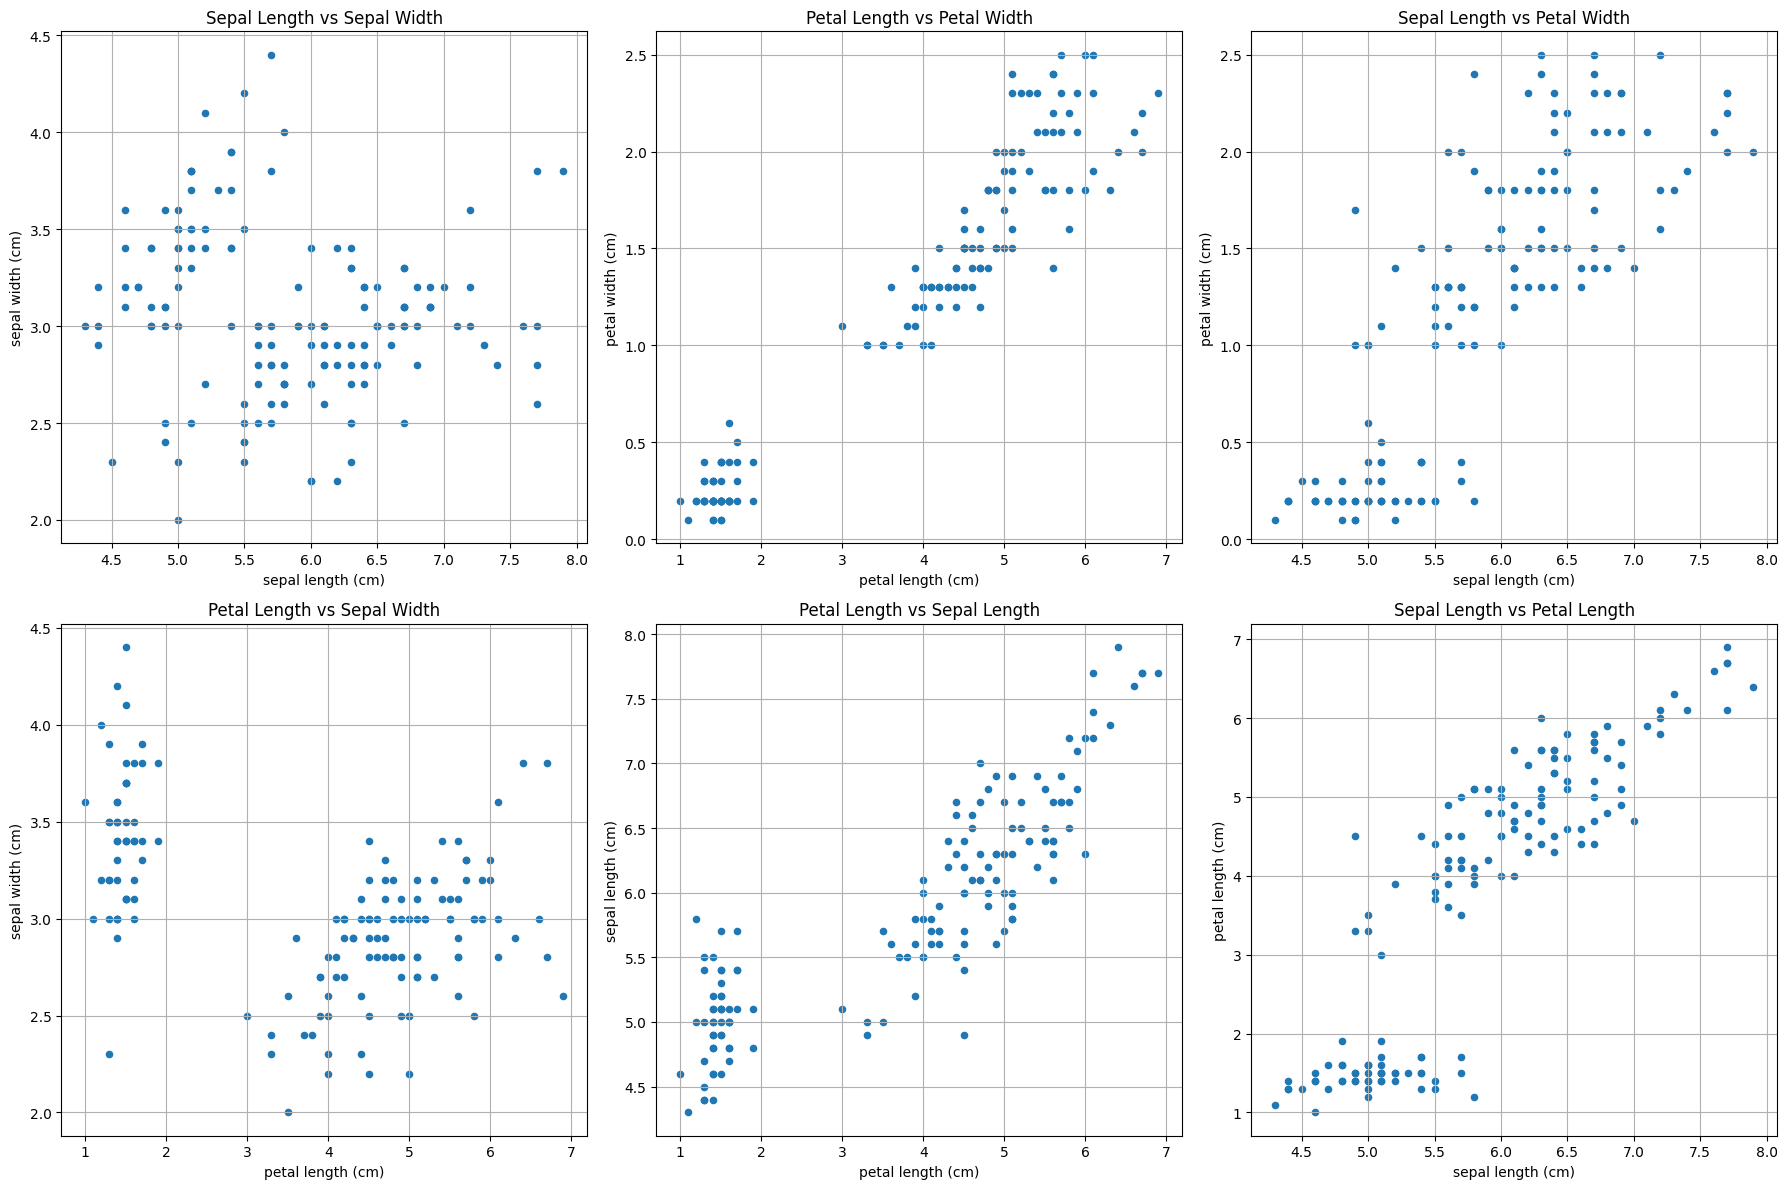

In [21]:
# Create a figure and a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Plot 1: Sepal length vs. Sepal width
df.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', ax=axes[0, 0])
axes[0, 0].set_title('Sepal Length vs Sepal Width')
axes[0, 0].grid()

# Plot 2: Petal length vs. Petal width
df.plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', ax=axes[0, 1])
axes[0, 1].set_title('Petal Length vs Petal Width')
axes[0, 1].grid()

# Plot 3: Sepal length vs. Petal width
df.plot(kind='scatter', x='sepal length (cm)', y='petal width (cm)', ax=axes[0, 2])
axes[0, 2].set_title('Sepal Length vs Petal Width')
axes[0, 2].grid()

# Plot 4: Petal length vs. Sepal width
df.plot(kind='scatter', x='petal length (cm)', y='sepal width (cm)', ax=axes[1, 0])
axes[1, 0].set_title('Petal Length vs Sepal Width')
axes[1, 0].grid()

# Plot 5: Petal length vs. Sepal length
df.plot(kind='scatter', x='petal length (cm)', y='sepal length (cm)', ax=axes[1, 1])
axes[1, 1].set_title('Petal Length vs Sepal Length')
axes[1, 1].grid()

# Plot 6: Sepal length vs. Petal length
df.plot(kind='scatter', x='sepal length (cm)', y='petal length (cm)', ax=axes[1, 2])
axes[1, 2].set_title('Sepal Length vs Petal Length')
axes[1, 2].grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

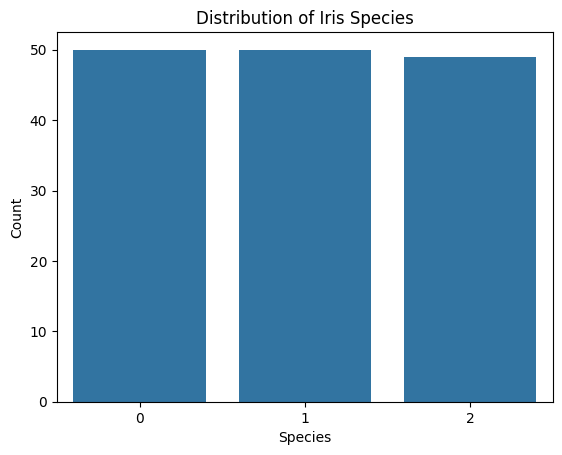

In [22]:
# Create a count plot for the target column 'class'
sns.countplot(x='class', data=df)
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

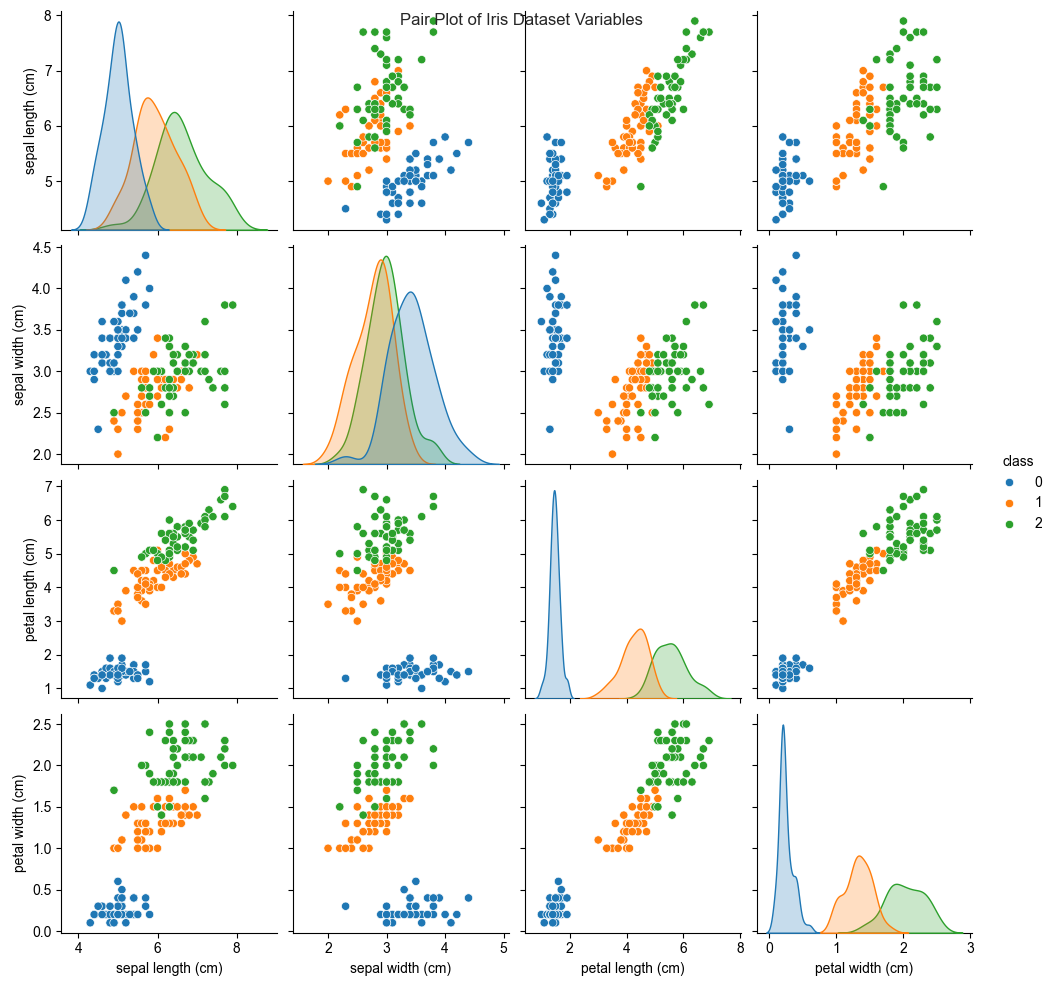

In [23]:
#create a pair plot
sns.pairplot(df,hue='class', palette='tab10')
sns.set_style("whitegrid")
plt.suptitle("Pair Plot of Iris Dataset Variables")
plt.show()

In [24]:
# Select column names with float64 data type
col_name = df.select_dtypes("float64").columns
col_name

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

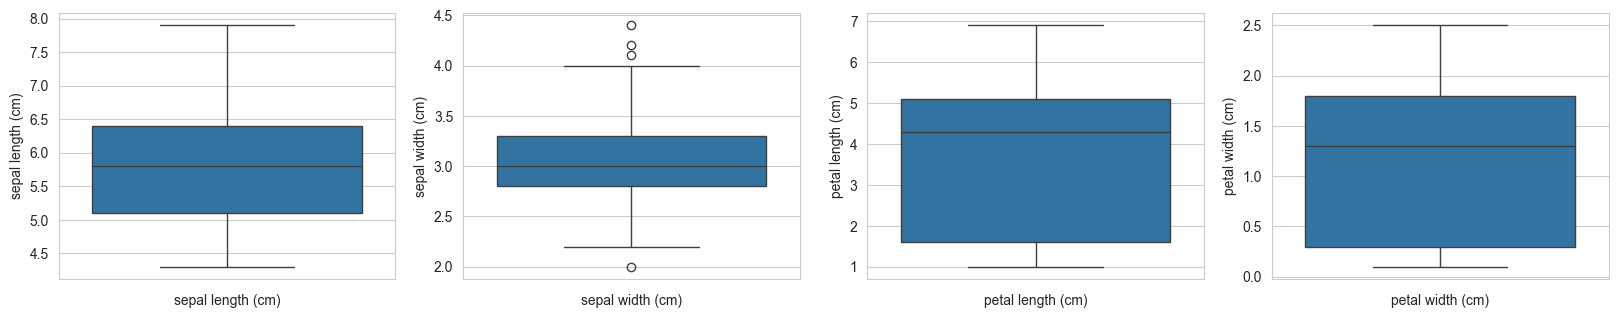

In [25]:
#box plot 
fig = plt.figure(figsize=(20,20))
counter = 0

for col in col_name:
    fig.add_subplot(5,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

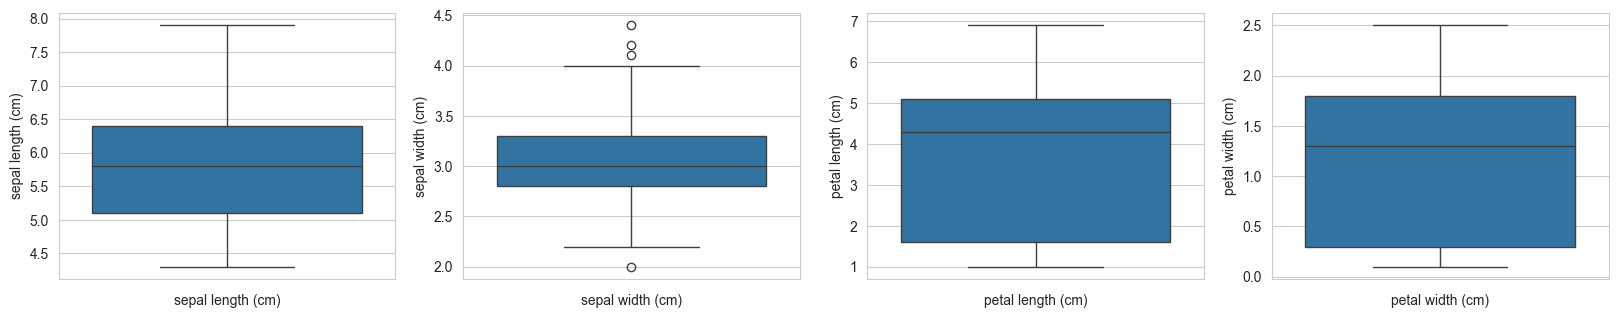

In [26]:
#box plot 
fig = plt.figure(figsize=(20,20))
counter = 0

for col in col_name:
    fig.add_subplot(5,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

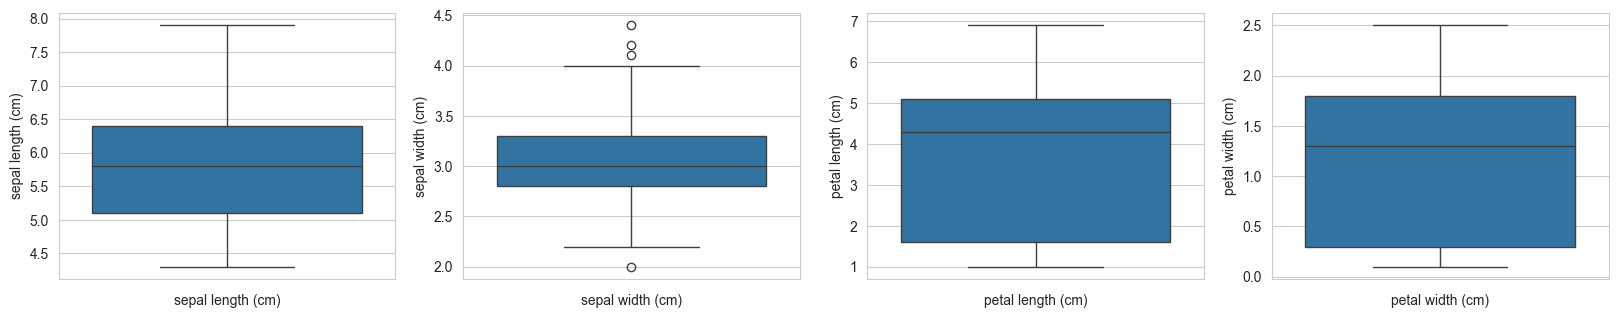

In [27]:
#box plot 
fig = plt.figure(figsize=(20,20))
counter = 0

for col in col_name:
    fig.add_subplot(5,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

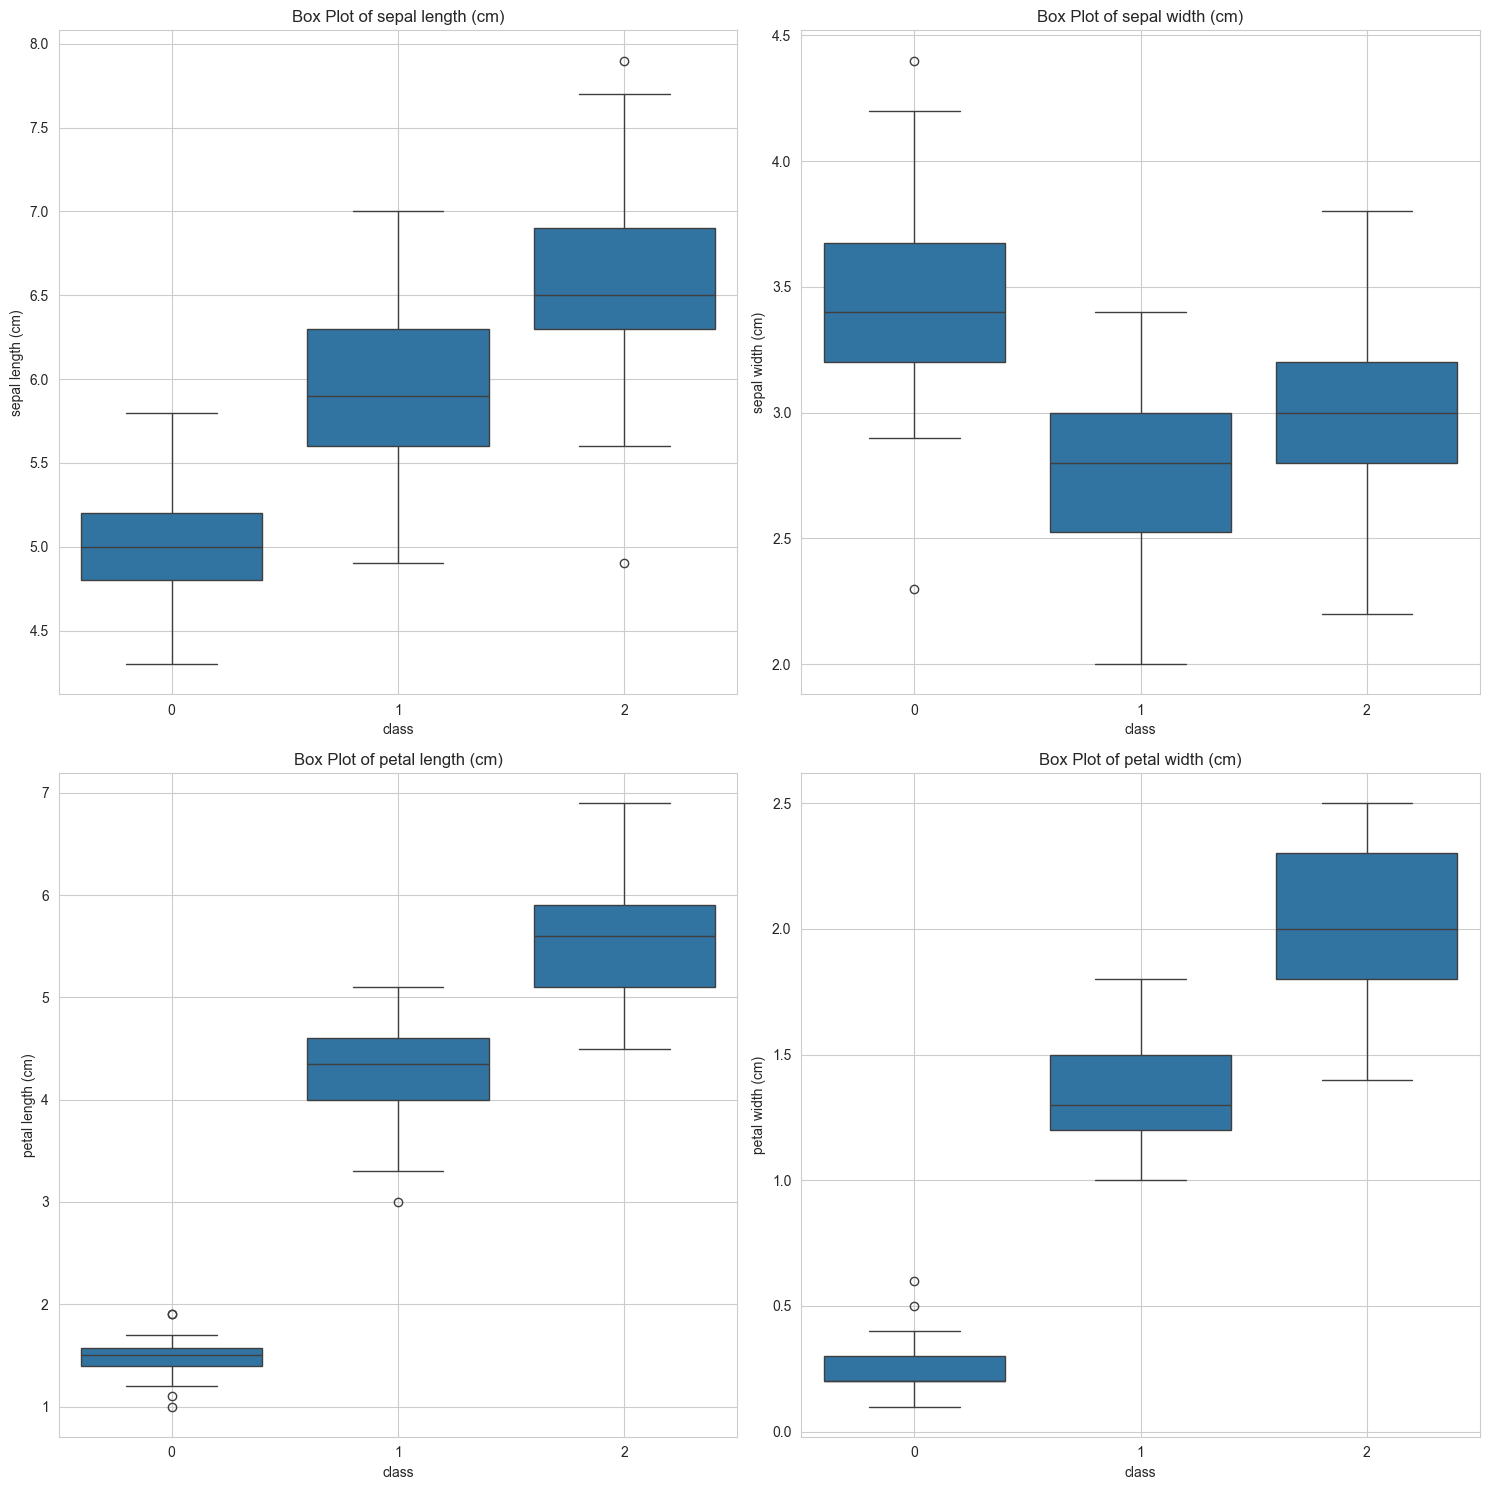

In [28]:
#creates a box plot for each feature
fig, axes = plt.subplots(2, 2, figsize=(15,15))
for i, col in enumerate(col_name):
    sns.boxplot(data=df, x='class', y=col, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Box Plot of {col}')
    axes[i // 2, i % 2].grid(True)
plt.tight_layout()
plt.show()

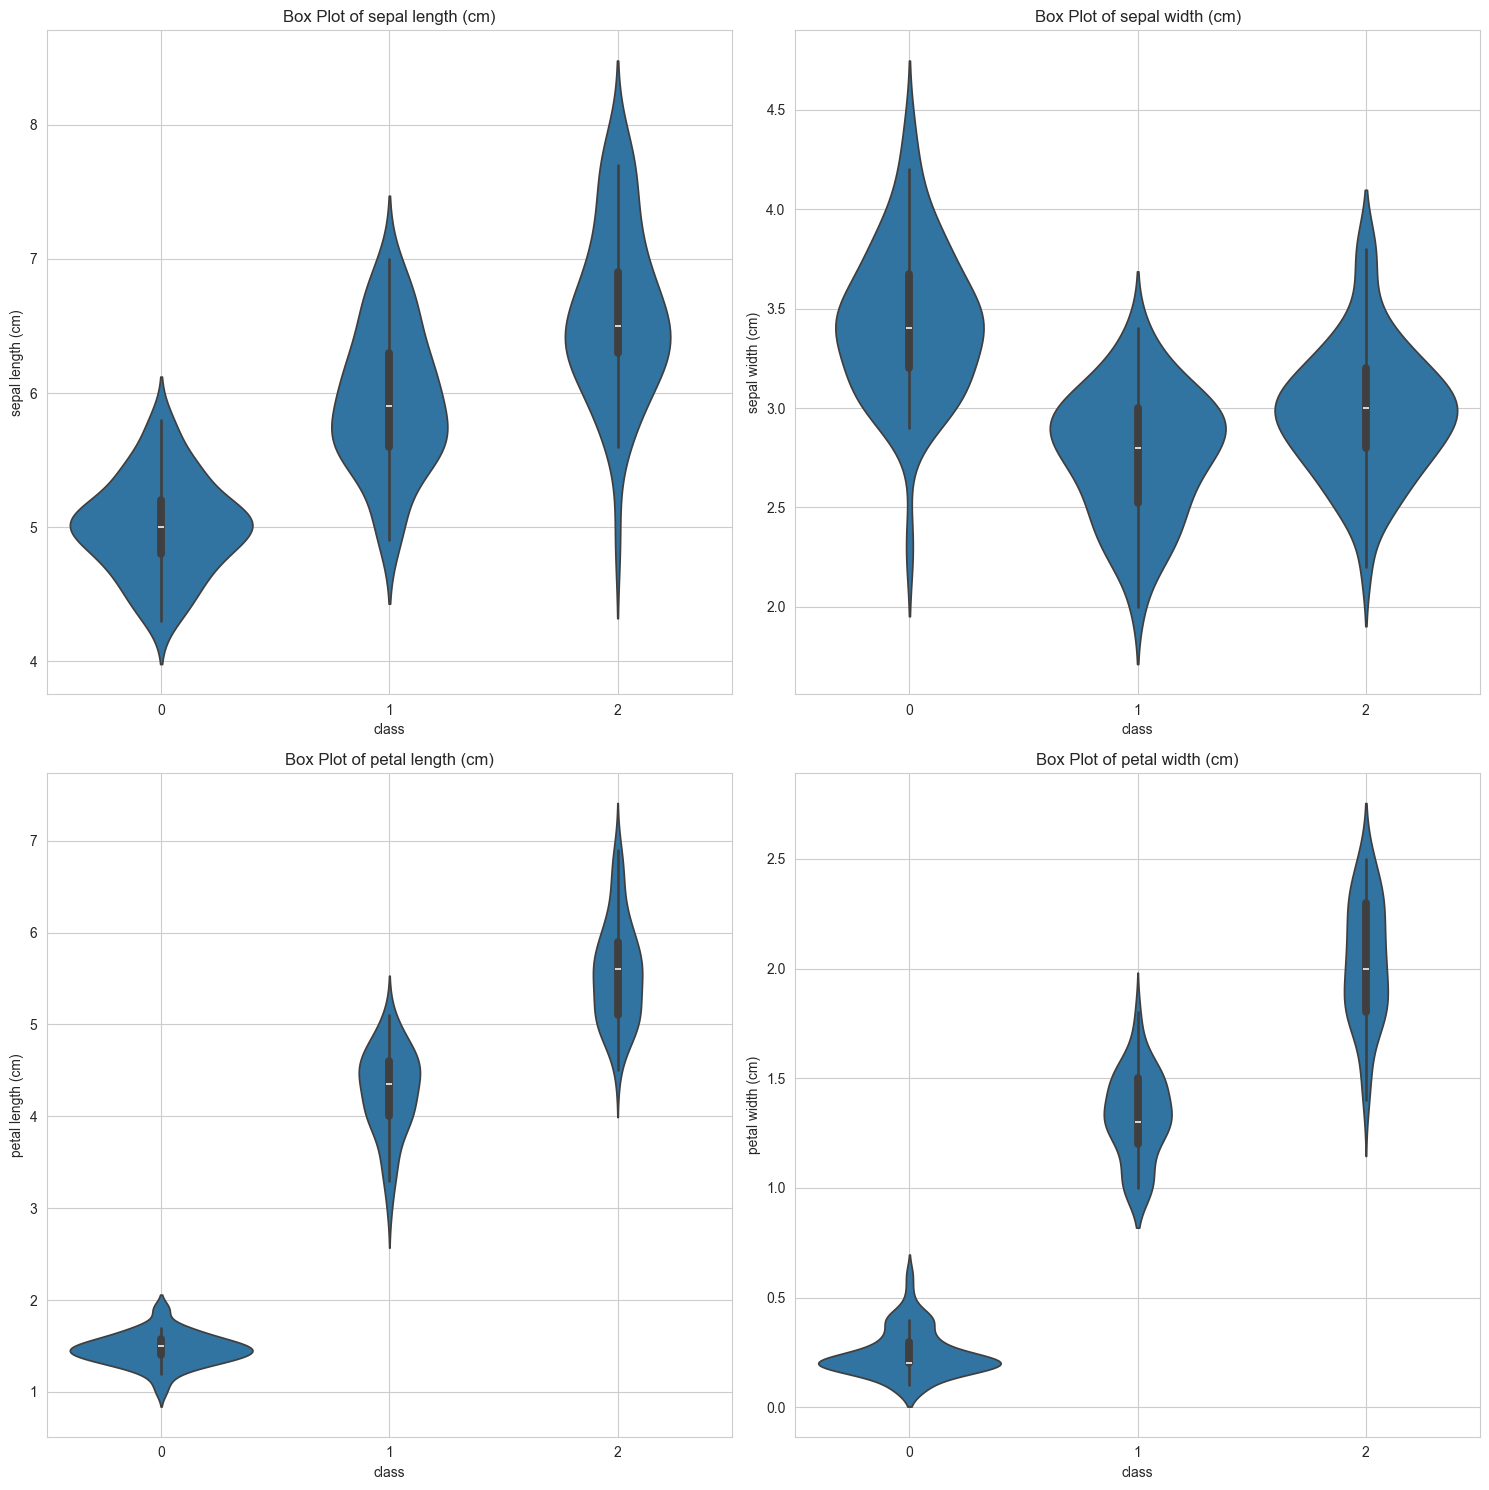

In [29]:
#creates a violin plot for each feature
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
for i, col in enumerate(col_name):
    sns.violinplot(data=df, x='class', y=col, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Box Plot of {col}')
    axes[i // 2, i % 2].grid(True)
plt.tight_layout()
plt.show()

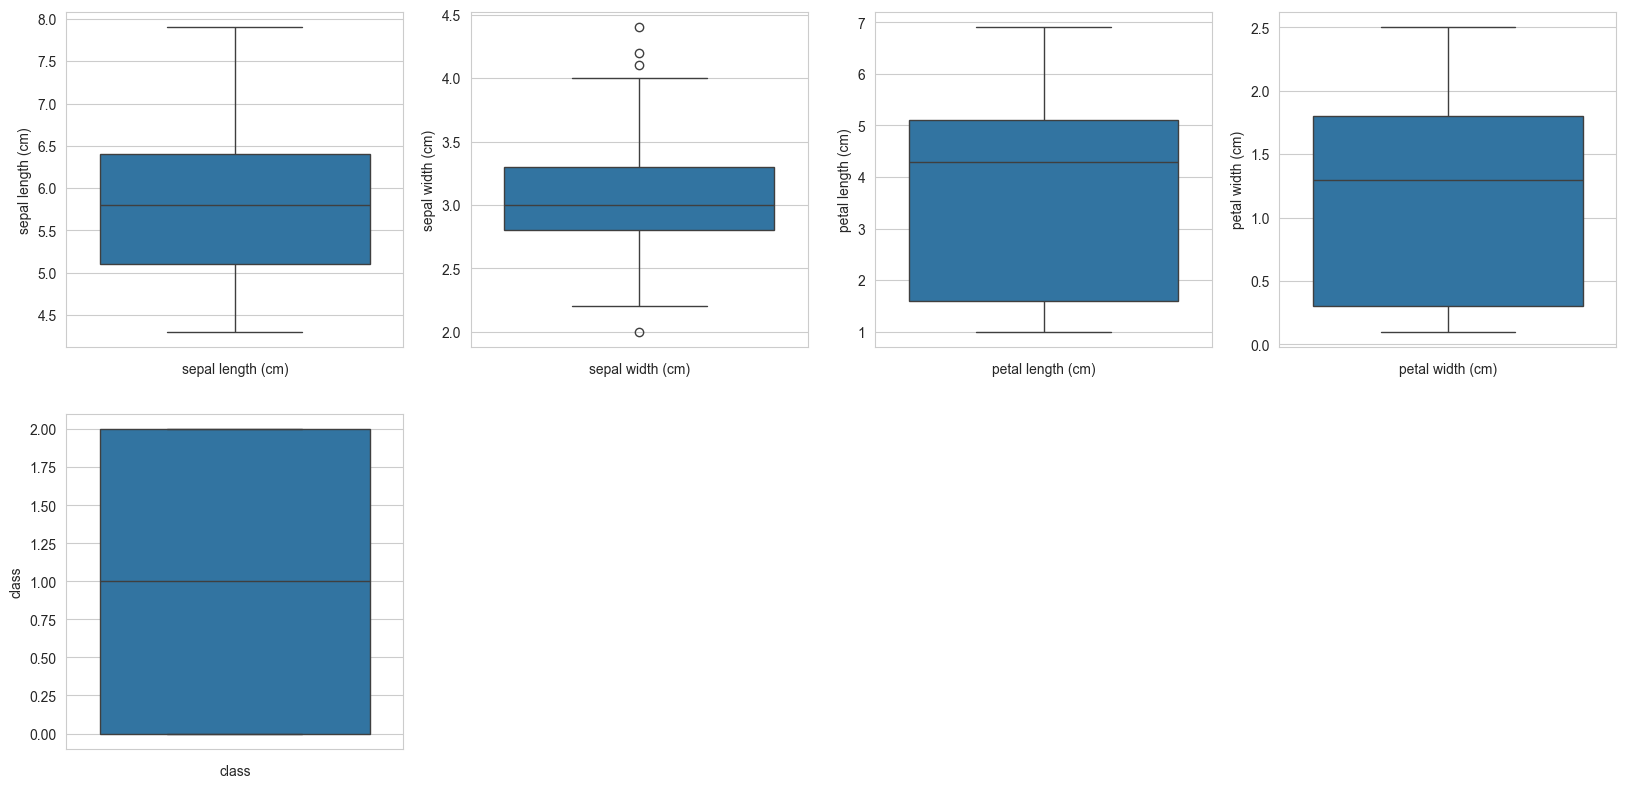

In [30]:
#box plot to identify outliers
fig = plt.figure(figsize=(20,20))
counter = 0

for col in df.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

In [31]:
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [32]:
#removing outliers using capping
for i in df.select_dtypes(include="number").columns:
    lw,uw=whisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i]) 

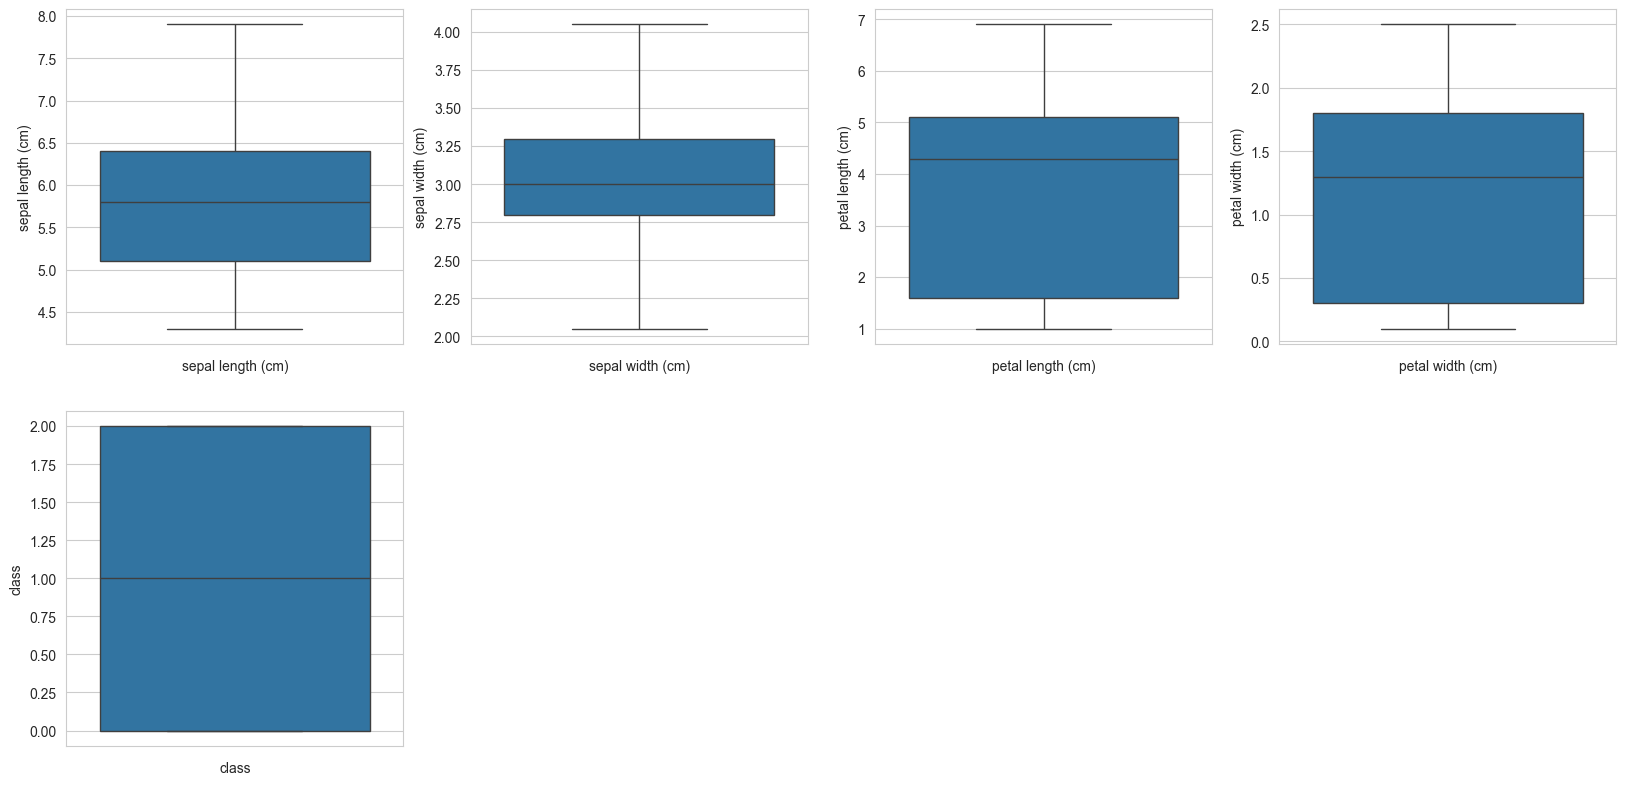

In [33]:
#box plot after outlier treatment
fig = plt.figure(figsize=(20,20))
counter = 0

for col in df.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

In [34]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2.0
145,6.3,2.5,5.0,1.9,2.0
146,6.5,3.0,5.2,2.0,2.0
147,6.2,3.4,5.4,2.3,2.0


In [35]:
#Feature Scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[col_name])

# Convert scaled data to DataFrame
scaled_df = pd.DataFrame(df_scaled, columns=col_name)

df[col_name] = scaled_df

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,0.222222,0.725,0.067797,0.041667,0.0
1,0.166667,0.475,0.067797,0.041667,0.0
2,0.111111,0.575,0.050847,0.041667,0.0
3,0.083333,0.525,0.084746,0.041667,0.0
4,0.194444,0.775,0.067797,0.041667,0.0
...,...,...,...,...,...
144,0.666667,0.475,0.711864,0.916667,2.0
145,0.555556,0.225,0.677966,0.750000,2.0
146,0.611111,0.475,0.711864,0.791667,2.0
147,0.527778,0.675,0.745763,0.916667,2.0


In [37]:
#Model Building

In [38]:
x=df.drop('class',axis=1)

In [39]:
y=df['class']

In [40]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.725,0.067797,0.041667
1,0.166667,0.475,0.067797,0.041667
2,0.111111,0.575,0.050847,0.041667
3,0.083333,0.525,0.084746,0.041667
4,0.194444,0.775,0.067797,0.041667
...,...,...,...,...
144,0.666667,0.475,0.711864,0.916667
145,0.555556,0.225,0.677966,0.750000
146,0.611111,0.475,0.711864,0.791667
147,0.527778,0.675,0.745763,0.916667


In [41]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
144    2.0
145    2.0
146    2.0
147    2.0
148    2.0
Name: class, Length: 149, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [43]:
# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=2)

In [44]:
#Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
Logistic_Model = LogisticRegression()
Logistic_Model.fit(x_train, y_train)

LogisticRegression()

In [46]:
LogisticRegression()

LogisticRegression()

In [47]:
Logistic_Model.score(x_test, y_test)

0.9333333333333333

In [48]:
y_PredictedLogistic = Logistic_Model.predict(x_test)
y_PredictedLogistic

array([2., 0., 0., 0., 2., 0., 2., 0., 2., 2., 0., 1., 2., 0., 2., 1., 0.,
       1., 2., 2., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 2., 0., 0.,
       1., 1., 2., 2., 1., 2., 1., 0., 2., 0., 2.])

In [49]:
from sklearn.metrics import confusion_matrix
cm_logistic = confusion_matrix(y_test, y_PredictedLogistic)
cm_logistic

array([[16,  0,  0],
       [ 0, 13,  2],
       [ 0,  1, 13]], dtype=int64)

In [50]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_logistic[0, 0]
FP = cm_logistic[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 1.0


Text(95.72222222222221, 0.5, 'Truth')

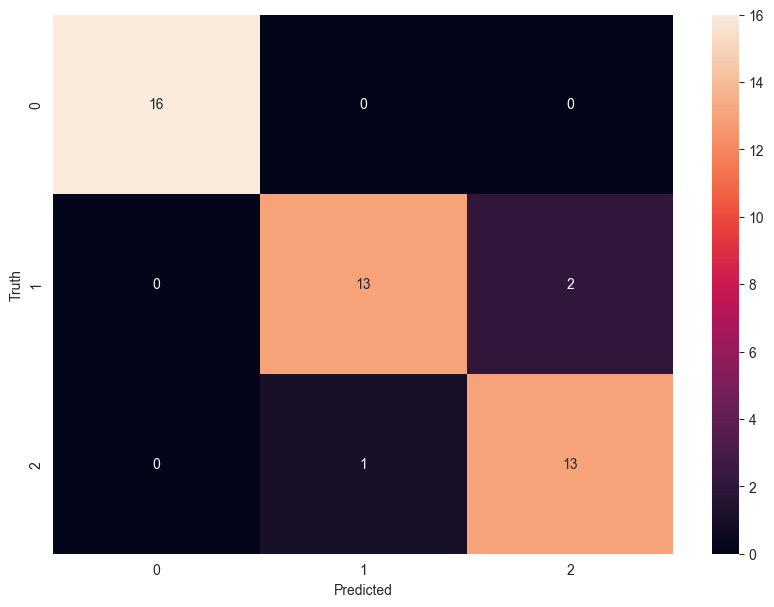

In [51]:
plt.figure(figsize = (10,7))
sns.heatmap(cm_logistic, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
Logistic_Model.score(x_test, y_test)

0.9333333333333333

In [53]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_PredictedLogistic)
print("Accuracy:", accuracy)

Accuracy: 0.9333333333333333


In [54]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_PredictedLogistic))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.93      0.87      0.90        15
         2.0       0.87      0.93      0.90        14

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [55]:
from sklearn.metrics import roc_auc_score

# Predict probabilities on test data
probslogistic = Logistic_Model.predict_proba(x_test)  

# Calculate AUC for classifier
auc_log = roc_auc_score(y_test, probslogistic, multi_class='ovr')

print("AUC for logistic Classifier:", auc_log)

AUC for logistic Classifier: 0.9924833589349719


In [56]:
#from sklearn.metrics import roc_auc_score

# Predict probabilities on test data
probslogistic = Logistic_Model.predict_proba(x_test)  

# Calculate AUC for classifier
auc_log = roc_auc_score(y_test, probslogistic, multi_class='ovr')

print("AUC for logistic Classifier:", auc_log)

AUC for logistic Classifier: 0.9924833589349719


In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
decision_model = DecisionTreeClassifier()
decision_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [59]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [60]:
y_predictedDecision= decision_model.predict(x_test)
y_predictedDecision

array([2., 0., 0., 0., 2., 0., 2., 0., 2., 2., 0., 1., 2., 0., 2., 1., 0.,
       1., 2., 2., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 2., 0., 0.,
       1., 1., 2., 1., 1., 2., 1., 0., 2., 0., 2.])

In [61]:
decision_model.score(x_test, y_test)

0.9555555555555556

In [62]:
#confusion Matrix
cm_decision = confusion_matrix(y_test,y_predictedDecision)
cm_decision

array([[16,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 13]], dtype=int64)

In [63]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_decision[0, 0]
FP = cm_decision[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 1.0


Text(95.72222222222221, 0.5, 'Truth')

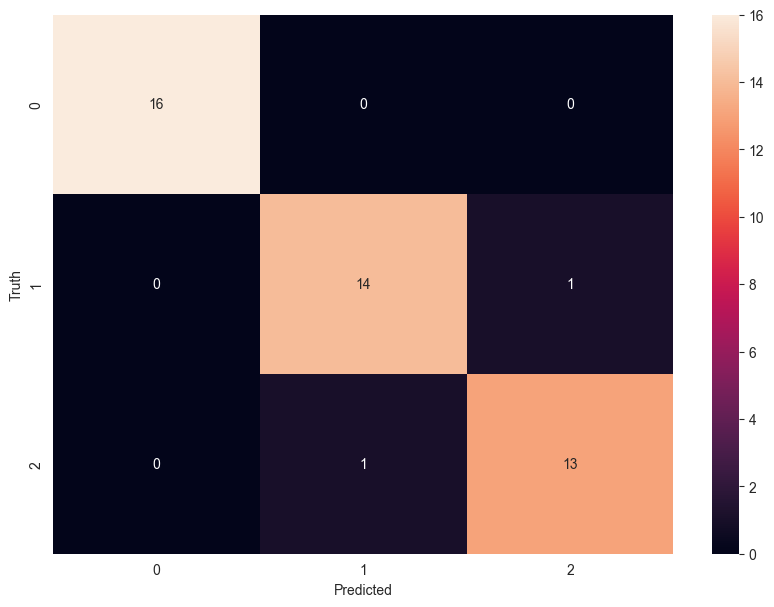

In [64]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_decision, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [65]:
decision_model.score(x_test, y_test)

0.9555555555555556

In [66]:
print(classification_report(y_test, y_predictedDecision))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.93      0.93      0.93        15
         2.0       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



[Text(0.4, 0.9166666666666666, 'x[2] <= 0.229\ngini = 0.667\nsamples = 104\nvalue = [34, 35, 35]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.35, 0.8333333333333333, 'True  '),
 Text(0.5, 0.75, 'x[3] <= 0.646\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.45, 0.8333333333333333, '  False'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 0.669\ngini = 0.149\nsamples = 37\nvalue = [0, 34, 3]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.3, 0.4166666666666667, 'x[1] <= 0.3\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.4, 0.25, 'x[2] <= 0.754\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 0.653\ngini = 0.059\nsamples = 33\nvalue = [0, 1, 32]'

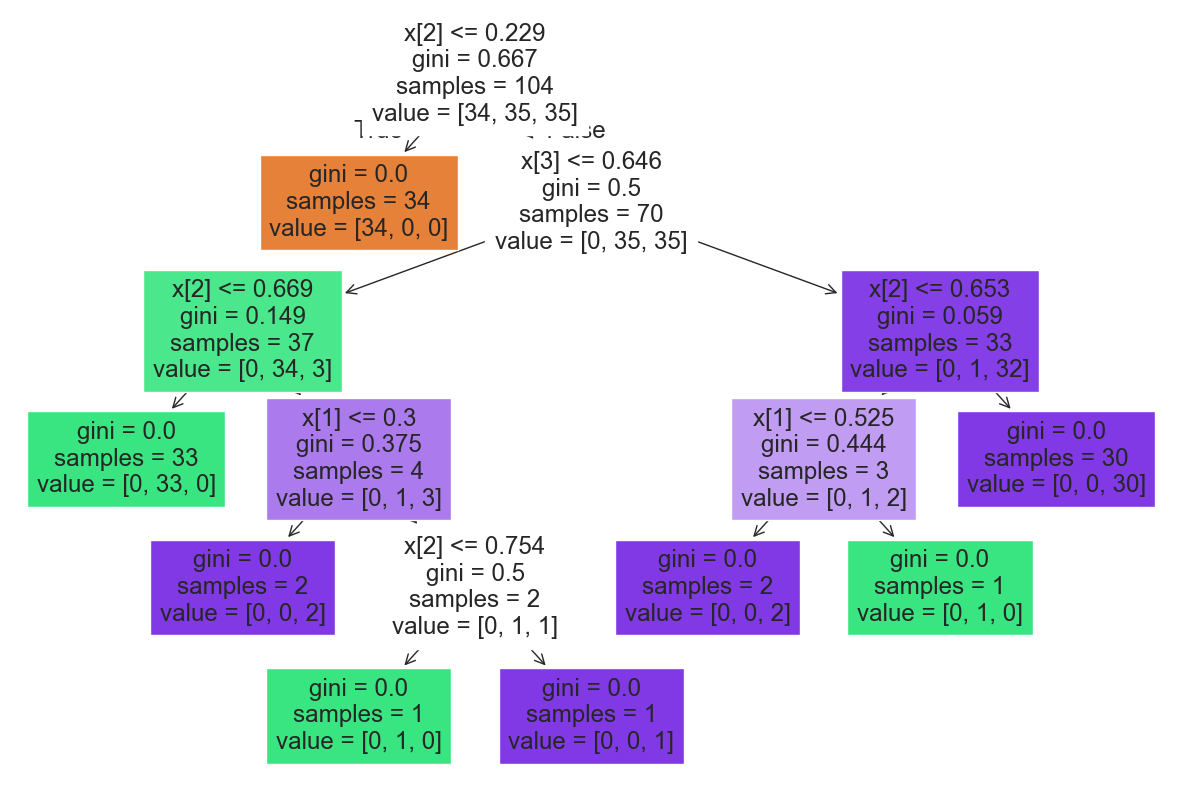

In [67]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(decision_model,filled=True)

In [68]:
# post pruning with max_depth=3
decision_model2=DecisionTreeClassifier(max_depth=2)
decision_model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [69]:
DecisionTreeClassifier(max_depth=2)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.292\ngini = 0.667\nsamples = 104\nvalue = [34, 35, 35]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 0.646\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.149\nsamples = 37\nvalue = [0, 34, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.059\nsamples = 33\nvalue = [0, 1, 32]')]

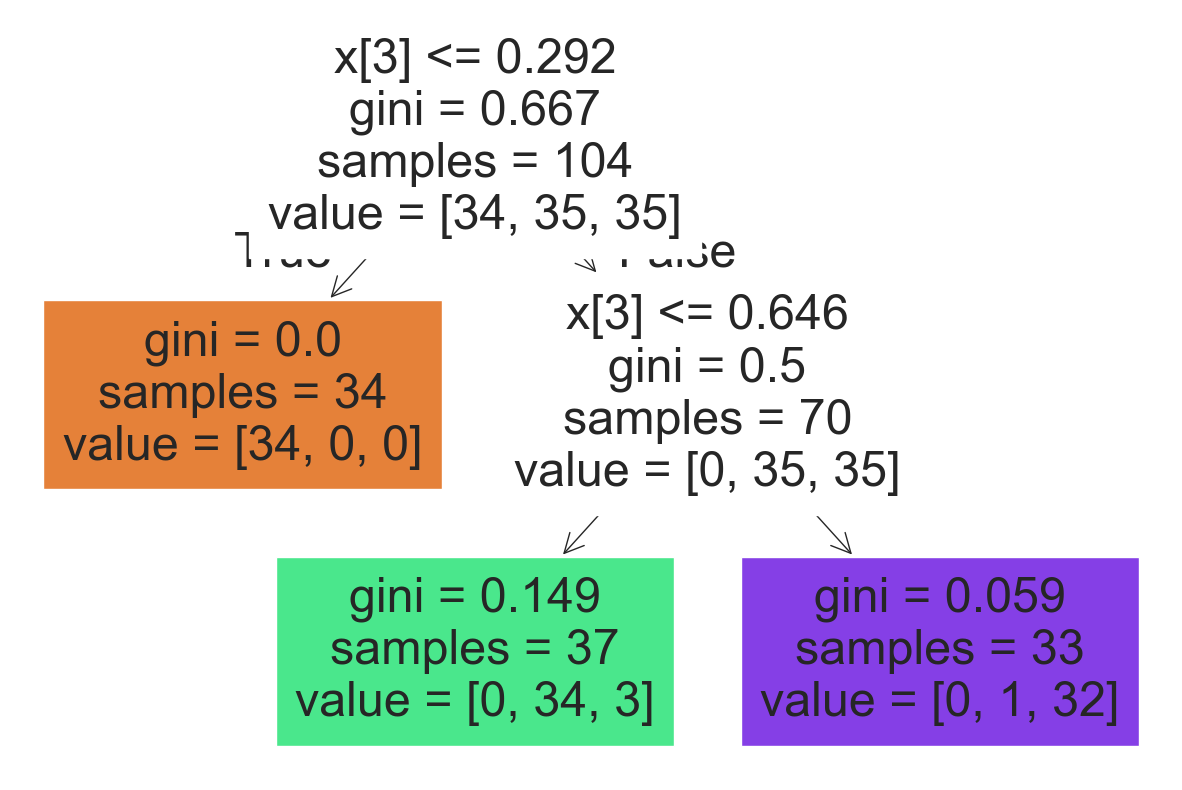

In [70]:
plt.figure(figsize=(15,10))
tree.plot_tree(decision_model2,filled=True)

In [71]:
y_predictedpruned= decision_model2.predict(x_test)
y_predictedpruned

array([2., 0., 0., 0., 2., 0., 2., 0., 2., 2., 0., 1., 2., 0., 2., 1., 0.,
       1., 2., 2., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 2., 0., 0.,
       1., 1., 2., 1., 1., 2., 1., 0., 2., 0., 2.])

In [72]:
print(accuracy_score(y_predictedpruned,y_test))

0.9555555555555556


In [73]:
#Finding best model using ccp_alpha
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define a function to train decision tree classifiers with pruning
def train_decision_tree_pruning(x_train, y_train, x_test, y_test):
    model = DecisionTreeClassifier()
    # Compute the complexity pruning path for the decision tree model based on the training data
    path = model.cost_complexity_pruning_path(x_train, y_train)
    # Extract effective alphas for pruning the decision tree
    ccp_alphas = path.ccp_alphas

    # Initialize empty lists to store trained models and their accuracies
    clfs = []
    accuracy = []

     # Loop through each value of ccp_alpha
    for ccp_alpha in ccp_alphas:
        # Instantiate a DecisionTreeClassifier with the current ccp_alpha
        clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
        clf.fit(x_train, y_train)
        # Append the trained model to the list of classifiers
        clfs.append(clf)
        pred = clf.predict(x_test)
        # Calculate accuracy and append it to the accuracy list
        accuracy.append(accuracy_score(y_test, pred))

    return path,ccp_alphas,clfs, accuracy

path,ccp_alphas,clfs, accuracy = train_decision_tree_pruning(x_train, y_train, x_test, y_test)

print(path)
print(ccp_alphas)
print(clfs)
print(accuracy)

{'ccp_alphas': array([0.        , 0.00721154, 0.00932401, 0.03859148, 0.26487589,
       0.33006657]), 'impurities': array([0.        , 0.01442308, 0.0330711 , 0.07166257, 0.33653846,
       0.66660503])}
[0.         0.00721154 0.00932401 0.03859148 0.26487589 0.33006657]
[DecisionTreeClassifier(random_state=0), DecisionTreeClassifier(ccp_alpha=0.007211538461538462, random_state=0), DecisionTreeClassifier(ccp_alpha=0.009324009324009317, random_state=0), DecisionTreeClassifier(ccp_alpha=0.03859147609147609, random_state=0), DecisionTreeClassifier(ccp_alpha=0.26487588987588995, random_state=0), DecisionTreeClassifier(ccp_alpha=0.33006656804733725, random_state=0)]
[0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.6888888888888889, 0.3333333333333333]


In [74]:
decision_modelalpha=DecisionTreeClassifier(ccp_alpha=0.014423076923076924, random_state=0)
decision_modelalpha.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.014423076923076924, random_state=0)

In [75]:
DecisionTreeClassifier(ccp_alpha=0.014423076923076924, random_state=0)

DecisionTreeClassifier(ccp_alpha=0.014423076923076924, random_state=0)

In [76]:
y_predalpha=decision_modelalpha.predict(x_test)
y_predalpha

array([2., 0., 0., 0., 2., 0., 2., 0., 2., 2., 0., 1., 2., 0., 2., 1., 0.,
       1., 2., 2., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 2., 0., 0.,
       1., 2., 2., 1., 1., 2., 1., 0., 2., 0., 2.])

In [77]:
#confusion Matrix
cm_bestccp = confusion_matrix(y_test,y_predalpha)
cm_bestccp

array([[16,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 14]], dtype=int64)

In [78]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_bestccp[0, 0]
FP = cm_bestccp[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 1.0


In [79]:
print(classification_report(y_test, y_predalpha))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      0.93      0.97        15
         2.0       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [80]:
# Predict probabilities on test data#bestmodel using GridSearchCV
decision_model3=DecisionTreeClassifier()
probs_tree = decision_modelalpha.predict_proba(x_test)  

# Calculate AUC for classifier
auc_decision = roc_auc_score(y_test, probs_tree, multi_class='ovr')

print("AUC for decision Classifier:", auc_decision  )

AUC for decision Classifier: 0.98868407578085


In [81]:
#bestmodel using GridSearchCV
decision_model3=DecisionTreeClassifier()

In [82]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']    
}

In [83]:
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(decision_model3,param_grid=parameter,cv=5,scoring='accuracy')
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [84]:
GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [85]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [86]:
y_pred3=cv.predict(x_test)
y_pred3

array([2., 0., 0., 0., 2., 0., 2., 0., 2., 2., 0., 1., 2., 0., 2., 1., 0.,
       1., 2., 2., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 2., 0., 0.,
       1., 1., 2., 1., 1., 2., 1., 0., 2., 0., 2.])

In [87]:
print(accuracy_score(y_pred3,y_test))

0.9555555555555556


In [88]:
best_modelgrid=DecisionTreeClassifier(criterion='gini', max_depth=3, max_features='sqrt', splitter='best')
best_modelgrid.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features='sqrt')

In [89]:
DecisionTreeClassifier(max_depth=3, max_features='sqrt')

DecisionTreeClassifier(max_depth=3, max_features='sqrt')

In [90]:
y_predictedbest=best_modelgrid.predict(x_test)

In [91]:
#confusion Matrix
cm_bestgrid = confusion_matrix(y_test,y_predictedbest)
cm_bestgrid

array([[16,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 13]], dtype=int64)

In [92]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_bestgrid[0, 0]
FP = cm_bestgrid[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 1.0


In [93]:
accuracy = accuracy_score(y_test, y_predictedbest)
print("Accuracy:", accuracy)

Accuracy: 0.9555555555555556


In [94]:
print(classification_report(y_test, y_predictedbest))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.93      0.93      0.93        15
         2.0       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [95]:
# Predict probabilities on test data
probs_tree = best_modelgrid.predict_proba(x_test)  

# Calculate AUC for classifier
auc_decision = roc_auc_score(y_test, probs_tree, multi_class='ovr')

print("AUC for decision Classifier:", auc_decision  )

AUC for decision Classifier: 0.9774773852193207


In [96]:
#Random Forest Classifier

In [97]:

from sklearn.ensemble import RandomForestClassifier

In [98]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [99]:
RandomForestClassifier()

RandomForestClassifier()

In [100]:
y_predictedrf = rf_model.predict(x_test)
y_predictedrf

array([2., 0., 0., 0., 2., 0., 2., 0., 2., 2., 0., 1., 2., 0., 2., 1., 0.,
       1., 2., 2., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 2., 0., 0.,
       1., 1., 2., 1., 1., 2., 1., 0., 2., 0., 2.])

In [101]:
print(accuracy_score(y_test,y_predictedrf))

0.9555555555555556


In [102]:
cm_random = confusion_matrix(y_test, y_predictedrf)
cm_random

array([[16,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 13]], dtype=int64)

In [103]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_random[0, 0]
FP = cm_random[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 1.0


Text(95.72222222222221, 0.5, 'Truth')

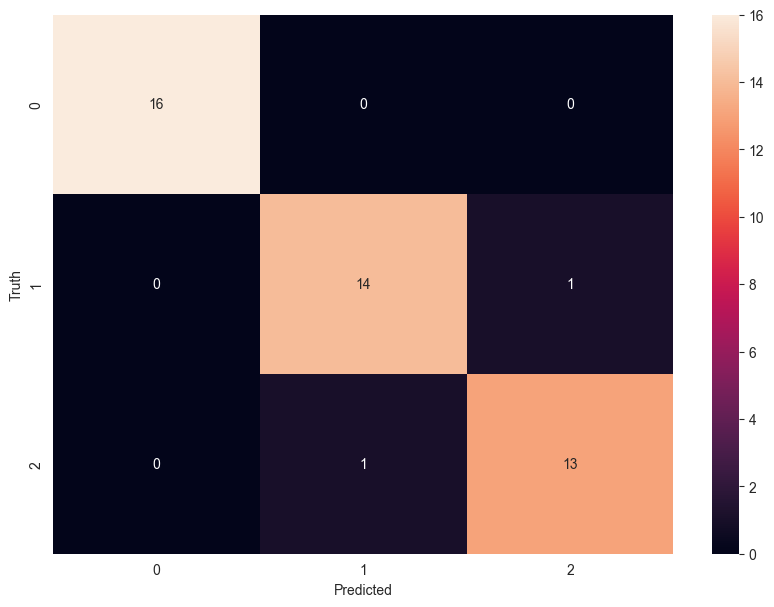

In [104]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_random, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [105]:

rf_model.score(x_test, y_test)

0.9555555555555556

In [106]:
accuracy = accuracy_score(y_test, y_predictedrf)
print("Accuracy:", accuracy)

Accuracy: 0.9555555555555556


In [107]:

print(classification_report(y_test,y_predictedrf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.93      0.93      0.93        15
         2.0       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [108]:
# Predict probabilities on test data
probsrf = rf_model.predict_proba(x_test)  

# Calculate AUC for classifier
auc_rf = roc_auc_score(y_test, probsrf, multi_class='ovr')

print("AUC for Random Forest Classifier:", auc_rf)

AUC for Random Forest Classifier: 0.9924833589349719


In [109]:
# K Nearest Neighbour(KNN)

In [110]:

from sklearn.neighbors import KNeighborsClassifier

In [111]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [112]:
KNeighborsClassifier()

KNeighborsClassifier()

In [113]:
y_predictedknn = KNN_model.predict(x_test)
y_predictedknn

array([2., 0., 0., 0., 2., 0., 2., 0., 2., 2., 0., 1., 2., 0., 2., 1., 0.,
       1., 2., 2., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 2., 0., 0.,
       1., 1., 2., 1., 1., 2., 1., 0., 2., 0., 2.])

In [114]:
print(accuracy_score(y_test,y_predictedknn))

0.9555555555555556


In [115]:
cm_knn = confusion_matrix(y_test, y_predictedknn)
cm_knn

array([[16,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 13]], dtype=int64)

In [116]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_knn[0, 0]
FP = cm_knn[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 1.0


Text(95.72222222222221, 0.5, 'Truth')

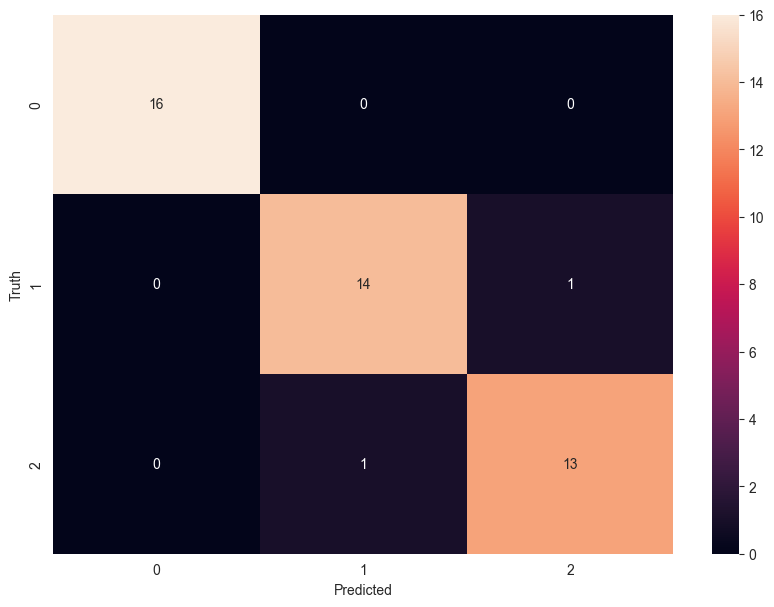

In [117]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_knn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [118]:

KNN_model.score(x_test, y_test)

0.9555555555555556

In [119]:
accuracy = accuracy_score(y_test, y_predictedknn)
print("Accuracy:", accuracy)

Accuracy: 0.9555555555555556


In [120]:
print(classification_report(y_test,y_predictedknn))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.93      0.93      0.93        15
         2.0       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [121]:
# Predict probabilities on test data
probsknn =KNN_model.predict_proba(x_test)  

# Calculate AUC for classifier
auc_knn = roc_auc_score(y_test, probsknn, multi_class='ovr')

print("AUC for KNN Classifier:", auc_knn)

AUC for KNN Classifier: 0.9984912101041133


In [122]:
#Naive Baye's

In [123]:
from sklearn.naive_bayes import GaussianNB

In [124]:
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

In [125]:
GaussianNB()

GaussianNB()

In [126]:
y_predictedNB = NB_model.predict(x_test)
y_predictedNB

array([2., 0., 0., 0., 2., 0., 2., 0., 2., 2., 0., 1., 2., 0., 2., 1., 0.,
       1., 2., 2., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 2., 0., 0.,
       1., 1., 2., 1., 1., 2., 1., 0., 2., 0., 2.])

In [127]:

print(accuracy_score(y_test,y_predictedNB))

0.9555555555555556


In [128]:
cm_nb = confusion_matrix(y_test, y_predictedknn)
cm_nb

array([[16,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 13]], dtype=int64)

In [129]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_nb[0, 0]
FP = cm_nb[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 1.0


Text(95.72222222222221, 0.5, 'Truth')

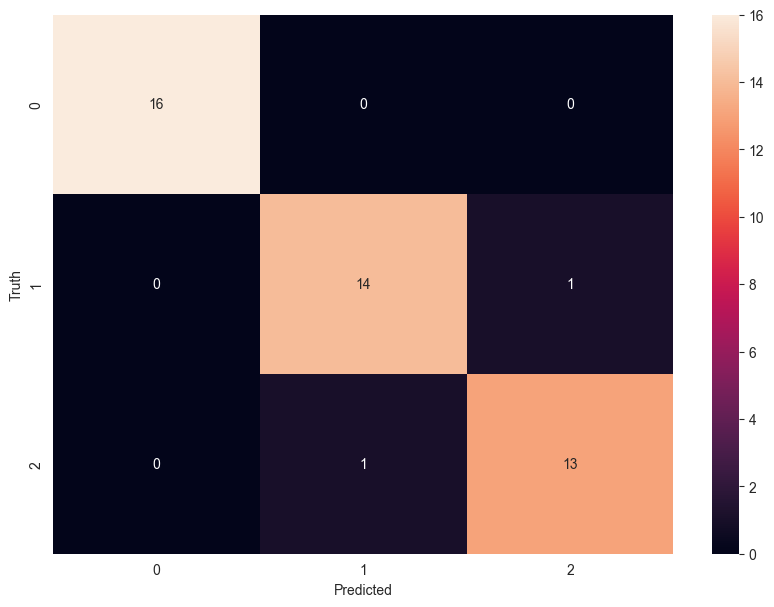

In [130]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_nb, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [131]:
NB_model.score(x_test, y_test)

0.9555555555555556

In [132]:
accuracy = accuracy_score(y_test, y_predictedNB)
print("Accuracy:", accuracy)

Accuracy: 0.9555555555555556


In [133]:

print(classification_report(y_test,y_predictedNB))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.93      0.93      0.93        15
         2.0       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [134]:

# Predict probabilities on test data
probsnb =NB_model.predict_proba(x_test)  

# Calculate AUC for classifier
auc_nb = roc_auc_score(y_test, probsnb, multi_class='ovr')

print("AUC for Naive Baye's Classifier:", auc_nb)

AUC for Naive Baye's Classifier: 0.99547363031234
